### We wanted to study how changing the decision boundary between the classes changes the LDA performance

Note: the feature used to classify the points is again the mean intensity of a cube of a certain size around the centroids

 

In [1]:
%matplotlib inline
import itertools

import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
def matrix_generation(master_data):
    
    ##training set, need the 1st 120 rows and 3rd and 7th column from feature csv file
    #for mean intensity value of synapses and non-synapses
    ## choosing 35% of the data to be training set
    training_synapses = master_data[:120, 3]
    training_non_synapses = master_data[:120, 7]
    train_syn = training_synapses[:, np.newaxis]
    train_non_syn = training_non_synapses[:, np.newaxis]

    
    ##Testing set, take next 220 rows and correct columns for synapses and non-synapses
    testing_synapses= master_data[120:340,3]
    testing_non_synapses = master_data[120:340,7]
    test_syn = testing_synapses[:, np.newaxis]
    test_non_syn = testing_non_synapses[:, np.newaxis]
    
    
    ### The final training set:
    train_data = np.vstack((train_syn, train_non_syn))
    test_data = np.vstack((test_syn, test_non_syn))
    ### The final label generation, synapses belong to class 1, non-synpases belong to class 0:
    train_labels = np.append(np.ones((len(train_syn))), np.zeros(len(train_non_syn)))
    
    return (train_data, train_labels, test_data)
 




### Use 4.84 ${\mu}m^3$ cube around synapse to classify the data

In [3]:

df = pd.read_csv('round1_size22.csv')
master_data = df.as_matrix()
train_data, train_labels, test_data = matrix_generation(master_data)

print(train_data.shape, train_labels.shape, test_data.shape)

(240, 1) (240,) (440, 1)


### After importing the data, perform LDA

Pass argument of decision boundary to LDA and make predictions for each class

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] Total wrong synapses: 0 Total wrong non-synapses: 220 Precision: 0.5 Recall: 1.0 F1 0.6666666666666666
[1 1

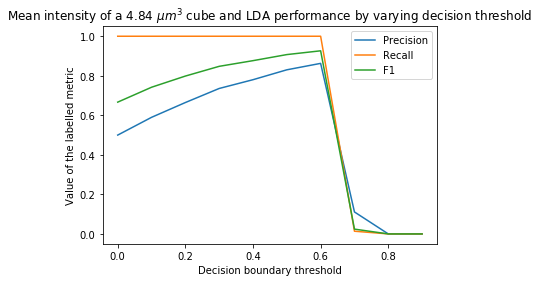

In [4]:


b = []
p = []
r = []
f = []
prediction_int_overlays = []
for i in np.arange(0.0, 1.0, 0.1):
    
    lda = LDA().fit(train_data, train_labels)
    probs_positive_class = lda.predict_proba(test_data)[:, 1]

    prediction = probs_positive_class > i
    prediction_int = prediction.astype(int)

    
    
    
       
    wrong_syn = 220-sum(prediction_int[:220]) ##know that the 1st 220 are synapses
    wrong_non_syn=sum(prediction_int[220:]) ###know that the last 220 are non-synapses
    precision = sum(prediction_int[:220])/ (sum(prediction_int[:220])+wrong_non_syn)
    recall = sum(prediction_int[:220])/ (sum(prediction_int[:220])+(220-sum(prediction_int[:220])))
    if precision and recall != 0:
        f1 = (2*precision*recall)/(precision + recall)
    else:
        f1 = 0 
    print(prediction_int, "Total wrong synapses:", wrong_syn, "Total wrong non-synapses:", wrong_non_syn, "Precision:",
         precision, "Recall:", recall, "F1", f1)
    p.append(precision)
    r.append(recall)
    b.append(i)
    f.append(f1)
    prediction_int_overlays.append(prediction_int)
    
plt.plot(b, p)
plt.plot(b, r)
plt.plot(b, f)
plt.xlabel('Decision boundary threshold')
plt.ylabel('Value of the labelled metric')

plt.legend(['Precision', 'Recall', "F1"], loc='upper right')
plt.title('Mean intensity of a 4.84 ${\mu}m^3$ cube and LDA performance by varying decision threshold')
plt.show()


    

          

### Use 0.6 boundary threshold data to overlay with ground truth, hence extract x,y,z locationd of non-synpases predicted as synpases

In [5]:

non_syn_locations = master_data[120:340,4:7]
z_array=[]
y_array=[]
x_array=[]

for idx, val in enumerate(prediction_int_overlays[6][220:]):
    if val==1:
        z_array.append(non_syn_locations[idx][0])
        y_array.append(non_syn_locations[idx][1])
        x_array.append(non_syn_locations[idx][2])
data={'Z':z_array,'Y':y_array,'X':x_array}
void=pd.DataFrame(data,columns=['Z','Y','X'])
void.to_csv('0.6_decision_4.84_cubes.csv')


In [6]:
sum(prediction_int_overlays[6][220:]) ##we have 37 non-synapses predicted as synapses

35

### Check LDA performance for the 1 ${\mu}m^3$ cube around centroids

In [7]:
### doing the same but with data from 1 microns cubed cube:
df = pd.read_csv('round1_size10.csv')
master_data = df.as_matrix()
train_data, train_labels, test_data = matrix_generation(master_data)

print(train_data.shape, train_labels.shape, test_data.shape)

(240, 1) (240,) (440, 1)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] Total wrong synapses: 0 Total wrong non-synapses: 220 Precision: 0.5 Recall: 1.0 F1 0.6666666666666666
[1 1

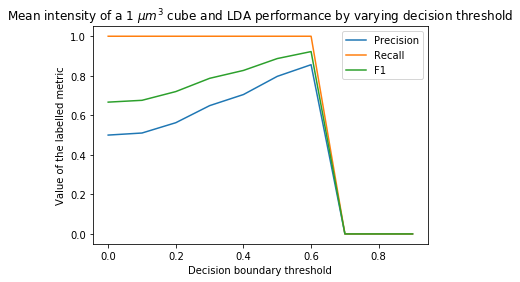

In [8]:
b = []
p = []
r = []
f = []
prediction_int_overlays = []
for i in np.arange(0.0, 1.0, 0.1):
    
    lda = LDA().fit(train_data, train_labels)
    probs_positive_class = lda.predict_proba(test_data)[:, 1]

    prediction = probs_positive_class > i
    prediction_int = prediction.astype(int)

    
    
    
       
    wrong_syn = 220-sum(prediction_int[:220]) ##know that the 1st 220 are synapses
    wrong_non_syn=sum(prediction_int[220:]) ###know that the last 220 are non-synapses
    precision = sum(prediction_int[:220])/ (sum(prediction_int[:220])+wrong_non_syn)
    recall = sum(prediction_int[:220])/ (sum(prediction_int[:220])+(220-sum(prediction_int[:220])))
    if precision and recall != 0:
        f1 = (2*precision*recall)/(precision + recall)
    else:
        f1 = 0 
    print(prediction_int, "Total wrong synapses:", wrong_syn, "Total wrong non-synapses:", wrong_non_syn, "Precision:",
         precision, "Recall:", recall, "F1", f1)
    p.append(precision)
    r.append(recall)
    b.append(i)
    f.append(f1)
    prediction_int_overlays.append(prediction_int)
    
plt.plot(b, p)
plt.plot(b, r)
plt.plot(b, f)
plt.xlabel('Decision boundary threshold')
plt.ylabel('Value of the labelled metric')

plt.legend(['Precision', 'Recall', "F1"], loc='upper right')
plt.title('Mean intensity of a 1 ${\mu}m^3$ cube and LDA performance by varying decision threshold')
plt.show()


    

         

### GENERATING OVERLAYS FOR 4.84 ${\mu}m^3$ cube around centroids

In [9]:
def overlay_code(image ,gt_ellipses, pred_ellipses, numb):
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.set_title('Z-slice =' + str(numb) + ': Overlay between ground-truth and false positives')
    ax.imshow(image, cmap = mpl.cm.gray)
    plt.autoscale(False)


    for idx, row in gt_ellipses.iterrows():
        x = row['X']
        y = row['Y'] 
        elps_1 = mpl.patches.Ellipse((x, y), width = 6, height = 10, edgecolor = 'g', lw = 2, facecolor = 'none')
        ax.add_patch(elps_1)


    for idx, row in pred_ellipses.iterrows():
        x = row['X'] 
        y = row['Y'] 
        elps_2 = mpl.patches.Ellipse((x, y), width = 6, height = 10, edgecolor = 'r', lw = 2, facecolor = 'none')
        ax.add_patch(elps_2)

    red_patch = mpl.patches.Patch(color = 'red', label = 'False Positive, Z-slice =' + str(numb))
    green_patch = mpl.patches.Patch(color = 'green', label = 'Ground Truth, Z-slice =' + str(numb))
    plt.legend(handles = [red_patch, green_patch], bbox_to_anchor = (1, 1), loc = 2)

    scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
    ax.add_artist(scalebar)
    ax.axis('off')

    
    plt.show()

### Open tif file 

In [10]:
from scipy.ndimage import imread

In [11]:
im1 = imread('slice_8.png')
im2 = imread('slice_3.png')

/Users/drishtimannan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/drishtimannan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


In [12]:
from skimage.color import rgb2gray
import matplotlib as mpl
import matplotlib.pyplot as plt





from matplotlib_scalebar.scalebar import ScaleBar

In [13]:
im1_final = rgb2gray(im1)
im2_final = rgb2gray(im2)

### Import csv file as pandas dataframe 

In [14]:
g_tru = pd.read_csv('ground_truth.csv')

non_syn = pd.read_csv('0.6_decision_4.84_cubes.csv')

### From pandas dataframe, extract only z-slice of a certain value

In [15]:
gt_8_ellipse = g_tru[g_tru['Z'] == 7]

non_syn_8_ellipse = non_syn[non_syn['Z'] == 7]




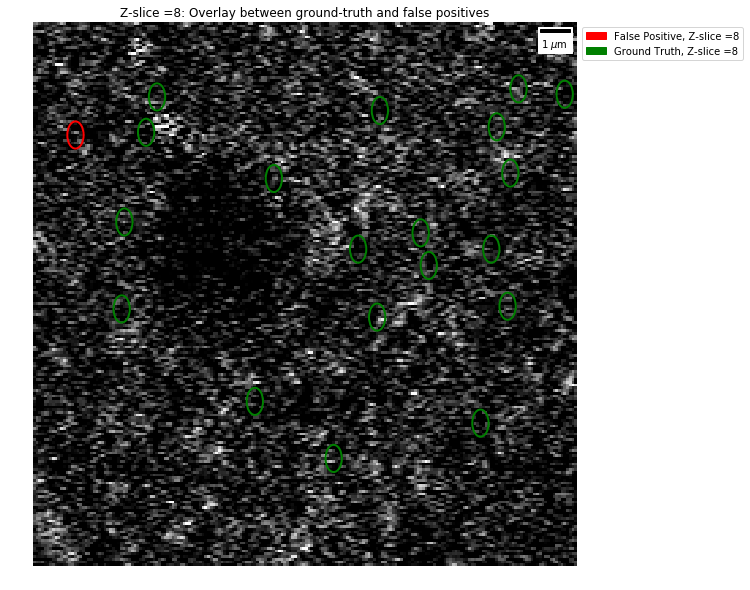

In [16]:
overlay_code(im1_final,gt_8_ellipse,non_syn_8_ellipse,8)

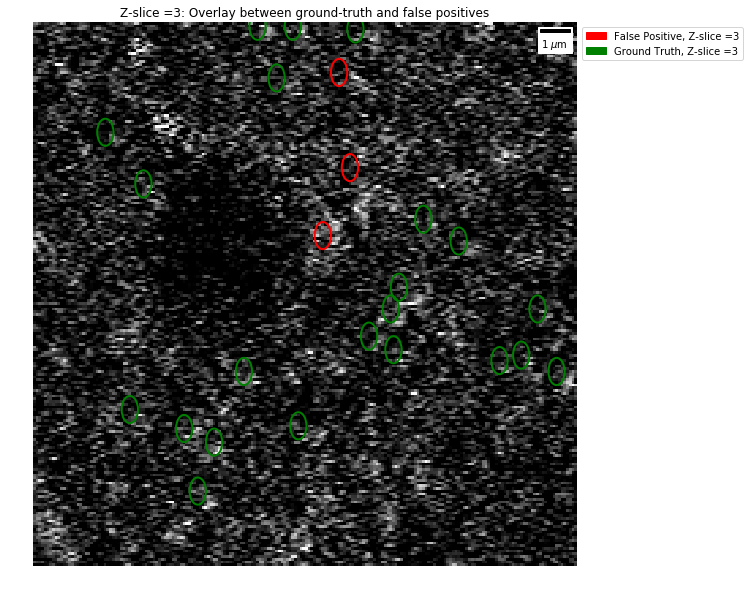

In [17]:
gt_3_ellipse = g_tru[g_tru['Z'] == 2]



non_syn_3_ellipse = non_syn[non_syn['Z'] == 2]


overlay_code(im2_final,gt_3_ellipse,non_syn_3_ellipse,3)